In [42]:
# messing around with this idea: https://twitter.com/AlexKontorovich/status/1172715174786228224
# obviously it's not going to work but it's really fun anyways

In [301]:
# the collatz sequence! 
# except this is a variant where you only get the odd numbers spat out at you
# the even numbers aren't that interesting

def collatz(number):
    number = int(number)
    assert number > 0
    while True:
        while number & 1 == 0:
            number = number >> 1
        yield number
        if number == 1:
            break
        number = 3 * number + 1

In [44]:
# cool_program = 887570260646934643447331259693373543698140232874500619768489156911
# for number in collatz(cool_program):
#     print(bin(number))

In [45]:
import numpy as np
import PIL.Image

In [86]:
# render any sequence as a binary image

def render_sequence(sequence, base = 2, scale = 2, limit = 10000):
    assert base <= 10
    to_base = lambda i: np.base_repr(i, base = base)
    static_sequence = []
    for i, number in enumerate(sequence):
        static_sequence.append(number)
        if i > limit:
            raise Exception('limit reached!', static_sequence)
    width = max(len(to_base(number)) for number in static_sequence) + 3
    height = len(static_sequence)
    array = np.asarray([[int(bit) for bit in to_base(number).zfill(width)] for number in static_sequence], dtype='uint8')
    image = PIL.Image.fromarray((base - 1 - array) * (255 // (base - 1)))
    return image.resize((image.size[0] * scale, image.size[1] * scale))

In [88]:
# render the collatz sequence

def render_collatz(start, base = 2, scale = 2, limit = 10000):
    return render_sequence(collatz(start), base, scale, limit)

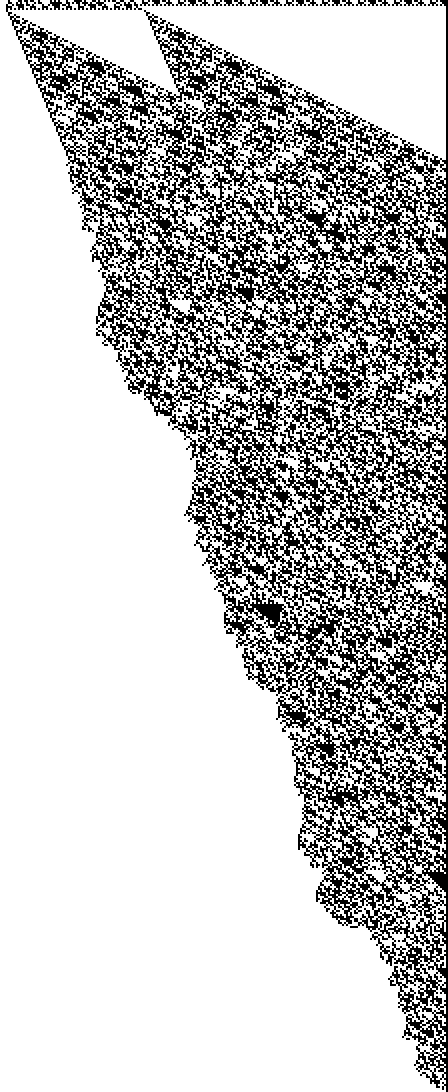

In [87]:
# cool_program = 887570260646934643447331259693373543698140232874500619768489156911
# render_collatz(cool_program)

In [48]:
# render_collatz(cool_program, 3)

In [49]:
# render_collatz(2**0 + 2**200 + 2**400)

In [50]:
# visualize [chop_start, chop_end) of a collatz sequence

def render_collatz_chopped(start, chop_start, chop_end, base = 2, scale = 2, limit = 10000):
    assert base <= 10
    to_base = lambda i: np.base_repr(i, base = base)
    sequence = []
    for i, number in enumerate(collatz(start)):
        sequence.append(number)
        if i > limit:
            raise Exception('limit reached!', sequence)
        if i > chop_end:
            break
    sequence = sequence[chop_start:chop_end]
    width = max(len(to_base(number)) for number in sequence) + 3
    height = len(sequence)
    array = np.asarray([[int(bit) for bit in to_base(number).zfill(width)] for number in sequence], dtype='uint8')
    image = PIL.Image.fromarray((base - 1 - array) * (255 // (base - 1)))
    return image.resize((image.size[0] * scale, image.size[1] * scale))

In [51]:
# render_collatz_chopped(2**0 + 2**200 + 2**400, 0, 150)

In [52]:
# credit: https://gist.github.com/jakevdp/c7a27b31bade6b4a41718a76305b5054

from ipywidgets import interact

def display_image(x):
    if type(x) == PIL.Image.Image:
        return x
    x_scaled = np.uint8(255 * (x - x.min()) / x.ptp())
    return PIL.Image.fromarray(x_scaled)

def display_sequence(images):
    def _show(frame=(0, len(images)-1)):
        return display_image(images[frame])
    return interact(_show)

In [53]:
# display_sequence([np.random.rand(200, 200) for i in range(50)])

In [54]:
# trying to see what happens as you bring two bits closer to each other... seems like a bunch of noise lol
# and they can't be too far away from each other because they grow really really fast... 
# which makes it harder and harder to control the emerging pattern

# sequence = []

# for i in range(200, 400):
#     sequence.append(render_collatz_chopped(2**0 + 2**i + 2**400, 0, 150))

# display_sequence(sequence)

In [55]:
import random

In [56]:
# program = (random.randint(0, 2**32)<<32)+1
# print(program)
# render_collatz(program)

0b101100001100101101000111111101000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111110000000000000000000000000000000000000000000000000000000000000000


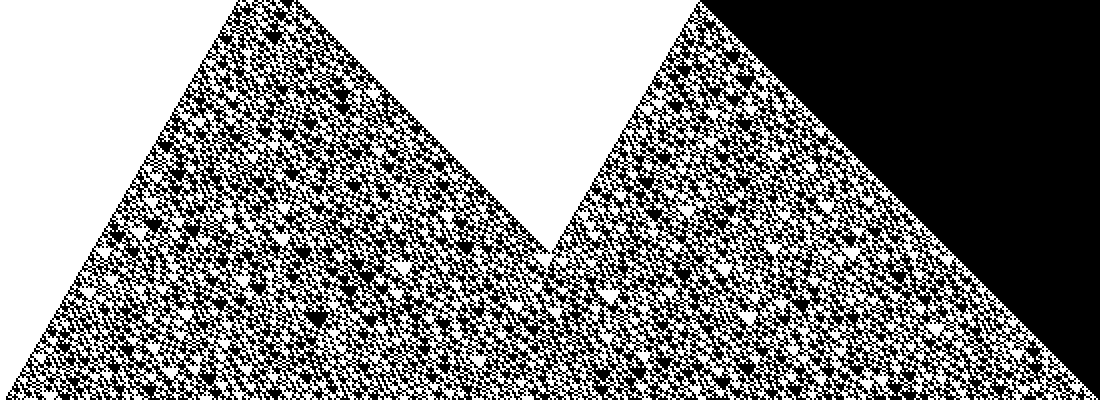

In [300]:
# trying to see what happens with a big sequence of 1s

# program = (((((2**200)-1)) + (random.randint(0, 2**32)<<400))<<64) #+ random.randint(0, 2**64)

# print(bin(program))
# render_collatz_chopped(program, 0, 200)

In [58]:
# trying to find a ratio of 3^i/2^j which best approximates 1 for given i where i is in [1, 100]
# point is to try and design a k-path on the right where the left part of the program stays stable on the left side

# actually this is wrong because it's more like a combination of (3/2^k) instead of being able to multiply by 3^n

# for i in range(1, 100):
#     j = (len(bin(3**i))-2)
#     ratio = (3**i)/(2**j)
#     if ratio < 0.6666:
#         j = j - 1
#         ratio = (3**i)/(2**j)
#     print(i, j, round(ratio, 3), round(abs(1-ratio), 3))

In [59]:
# was trying to solve for the ratio of i:j which would give something closest to 1
# this was my old idea for finding stable kpaths - come up with a random kpath consisting of 1 and 2
# then construct the program. p(1) = the ratio of i:j. if you look below, this problem was solved in closed form
# which was really dumb of me to not try initially... haven't done enough math recently :(

# ((3/2) ** i) * ((3/4) ** j)

# for i in range(1, 200):
#     lowest_score = 100
#     lowest_j = None
#     for j in range(i, 400):
#         score = abs(1 - (((3/2) ** i) * ((3/4) ** j)))
#         if score < lowest_score:
#             lowest_j = j
#             lowest_score = score
#     j = lowest_j
#     score = lowest_score
#     print(i, j, i/j, score)

# ratio was between 0.7 and 0.72


# best_score_overall = 100
# best_ij = None

# for i in range(1, 1000):
#     lowest_score = 100
#     lowest_j = None
#     highest_i = int(i / 0.7) + 1
#     lowest_i = int(i / 0.72)
#     for j in range(lowest_i, highest_i+1):
#         score = abs(1 - (((3/2) ** i) * ((3/4) ** j)))
#         if score < lowest_score:
#             lowest_j = j
#             lowest_score = score
#     j = lowest_j
#     score = lowest_score
#     if score < best_score_overall:
#         best_score_overall = score
#         print(i, j, i/j, score)
#         best_ij = (i, j)

# print('best_ij', best_ij, 'ratio', best_ij[0]/best_ij[1])

# closed form:
# i = 0.7095115681233933
# ((3/2) ** (100*i)) * ((3/4) ** (100)) = 1
# (where 100 is acting in place of some big N... so it can just be 1 if i is a real number)
# ((3/2) ** i) * ((3/4)) = 1
# i = log(4/3)/log(3/2) ~= 0.7095
# 0.709511291351454776976190262174014140615003735236107223074

In [60]:
# ignore this cell

# program = (((((2**200)-1)) + (random.randint(0, 2**32)<<400))<<64) #+ random.randint(0, 2**64)

# print(bin(program))
# render_collatz_chopped(program, 0, 200)

# sample_kpath = lambda: [1, 2][random.random() < 0.709511291351454776976190262174014140615003735236107223074]

# def generate_stable_kpath(length):
#     program = 0
#     for i in range(length):
#         program += (i << length) * 


# hang on a second... i have no idea how to construct a program from a desired kpath; i just know how to find the
# next program with that kpath
# pretty sure this is not explained anywhere in the paper; it's just explained that there is an arithmetic progression

In [61]:
def kpath(number):
    number = int(number)
    assert number > 0
    while True:
        k = 0
        while number & 1 == 0:
            number = number >> 1
            k += 1
        if k > 0:
            yield k
        if number == 1:
            break
        number = 3 * number + 1

In [62]:
# list(kpath(17))

In [63]:
# i = 2
# list(kpath(6 * ((2**5)*i + 2) + 5))
# # k-path will always start with (2, 3) for any i


In [299]:
# verifying i understood claims in paper about uniqueness of kpaths... i think i understood them

# i = 100
# program = 6 * ((2**5)*i + 2) + 5
# print(program)
# # list(kpath(program))
# # k-path will always start with (2, 3) for any i
# i = i + 1
# program2 = 6 * ((2**5)*i + 2) + 5
# print(program2 - program)


In [65]:
# for program in range(19215, 19217+400):
#     if program % 6 != 5:
#         continue
#     ks = list(kpath(program))
#     if ks[0] == 2 and ks[1] == 3:
#         print(program)

In [66]:
# yeah wait the paper keeps claiming there's a way to calculate the program from the kpath;
# but all i can see is that there exists every kpath, not that there's an easy way to find it...

In [67]:
# a search for just finding a factor of 1 probably would do better than a search for a given kpath...
# especially since we kind of want really long kpaths which repeat; where the 2^(sum_kpath) term is huuuge

In [68]:
import scipy.stats

In [69]:
# trying to figure out how much this short right hand side program will affect the left edge of the left / right
# the implementation is wrong; see straight left edge below for a correct implementation

# def length_effect(program, first_n = 100):
#     factors = []
#     for i, k in enumerate(kpath(program)):
#         if i > first_n:
#             break
#         factors.append((3 / (2 ** k)))
#     return scipy.stats.gmean(factors)

In [70]:
# length_effect(2**500 - 1), length_effect(2**500 + 1)

In [71]:
def randomize_bits(zeroes, ones):
    bits = [0] * zeroes + [1] * ones
    random.shuffle(bits)
    program = 0
    for i, bit in enumerate(bits):
        program += bit * (2 ** i)
    return program

In [72]:
# length_effect(randomize_bits(149, 363))

In [73]:
# try to guess how many 1 bits there should be in a given program length on the right hand side so it remains stable

# similar to the idea of trying to construct a program given a really long k-path where the left hand side remains
# at around the same place

# pretty sure implementation is wrong; see straight left edge idea below which does this better

# def estimate_fraction_ones(program_length, samples=1000):
#     best_score = 100
#     best_ones = None
#     for zeroes in range(1, program_length - 2): # zeroes have to be gt 1
#         ones = program_length - zeroes
#         effect = scipy.stats.gmean([length_effect(randomize_bits(zeroes, ones), first_n = 10) for sample in range(samples // program_length)])
#         score = abs(1 - effect)
#         if score < best_score:
#             best_ones = ones
#             best_score = score
#     return best_score, best_ones

In [74]:
# estimate_fraction_ones(1000, samples=10**4)

In [75]:
# length_effect(randomize_bits(1000-919, 919), first_n=10)

In [76]:
# render_collatz(randomize_bits(1000-919, 919))

In [77]:
from collections import defaultdict
import math

# find programs which have a straight left edge
# conclusion: moderately interesting

# program_length = 500
# number_ones = 920//2

# stablest_k_scores = defaultdict(lambda: 200)
# stablest_k_programs = defaultdict(lambda: None)

# while True:
#     try:
#         lengths = []
#         program = randomize_bits(program_length-number_ones, number_ones) # program = program + 1
#         for i, number in enumerate(collatz(program)):
#             if i == 0:
#                 starting_length = math.log(program)
#             lengths.append(math.log(number))
#             score = sum((starting_length - length)**2 for length in lengths) ** 0.5
#             if score < stablest_k_scores[i]:
#                 stablest_k_scores[i] = score
#                 stablest_k_programs[i] = program
#                 print(i, score)
#     except KeyboardInterrupt:
#         break
        

'\nprogram_length = 500\nnumber_ones = 920//2\n\nstablest_k_scores = defaultdict(lambda: 200)\nstablest_k_programs = defaultdict(lambda: None)\n\nwhile True:\n    try:\n        lengths = []\n        program = randomize_bits(program_length-number_ones, number_ones) # program = program + 1\n        for i, number in enumerate(collatz(program)):\n            if i == 0:\n                starting_length = math.log(program)\n            lengths.append(math.log(number))\n            score = sum((starting_length - length)**2 for length in lengths) ** 0.5\n            if score < stablest_k_scores[i]:\n                stablest_k_scores[i] = score\n                stablest_k_programs[i] = program\n                print(i, score)\n    except KeyboardInterrupt:\n        break\n        \n'

In [78]:
# index = 200
# # program = stablest_k_programs[index]
# program = randomize_bits(1000-950, 950)
# render_collatz_chopped(program + 2**3000, 0, index)

In [79]:
# index = 200
# program = stablest_k_programs[index]
# # program = randomize_bits(1000-950, 950)
# render_collatz_chopped(program + 2**3000, 0, index)

In [80]:
# index = 250
# program = stablest_k_programs[index]
# # program = randomize_bits(1000-950, 950)
# render_collatz_chopped(program + 2**1000, 0, index)

In [81]:
# find a random program which best avoids moving to the right
# conclusion: super useless...

# program_length = 512
# number_ones = 400
# program_starting_point = 1000

# leftest_k_scores = defaultdict(lambda: 0.45)
# leftest_k_programs = defaultdict(lambda: None)


# while True:
#     try:
#         right_hand_sides = []
#         program = (randomize_bits(program_length-number_ones, number_ones) << program_starting_point) + 1
#         for i, number in enumerate(collatz(program)):
#             #right_hand_sides.append(number & (((2**(2*i)) - 1) << program_starting_point))
#             right_hand_sides.append(number & ((2 ** program_starting_point) - 1))
#             if i == 0:
#                 continue
#             score = sum(bin(right_hand_side).count('1') for right_hand_side in right_hand_sides) / sum(2 * I for I in range(i+1))
#             if score < leftest_k_scores[i]:
#                 leftest_k_scores[i] = score
#                 leftest_k_programs[i] = program
#                 print(i, score)
#             if i*2 > program_starting_point:
#                 break
#     except KeyboardInterrupt:
#         break


"\n\nprogram_length = 512\nnumber_ones = 400\nprogram_starting_point = 1000\n\nleftest_k_scores = defaultdict(lambda: 0.45)\nleftest_k_programs = defaultdict(lambda: None)\n\n# find the program which best avoids moving to the right\n\nwhile True:\n    try:\n        right_hand_sides = []\n        program = (randomize_bits(program_length-number_ones, number_ones) << program_starting_point) + 1\n        for i, number in enumerate(collatz(program)):\n            #right_hand_sides.append(number & (((2**(2*i)) - 1) << program_starting_point))\n            right_hand_sides.append(number & ((2 ** program_starting_point) - 1))\n            if i == 0:\n                continue\n            score = sum(bin(right_hand_side).count('1') for right_hand_side in right_hand_sides) / sum(2 * I for I in range(i+1))\n            if score < leftest_k_scores[i]:\n                leftest_k_scores[i] = score\n                leftest_k_programs[i] = program\n                print(i, score)\n            if i*2 >

In [89]:
# investigating what happens with a random program which is started way off on the left, with 1 on the right

# image_sequence = []

# program_starting_point = 300
# program_run_time = program_starting_point // 2
# program_length = program_run_time

# for i in range(32):
#     program = (randomize_bits(program_length//2, program_length//2) << program_starting_point) + 1
#     sequence = [number & ((2**program_starting_point)-1) for number in list(collatz(program))[:program_run_time]]
#     image_sequence.append(render_sequence(sequence))

# display_sequence(image_sequence)

<function __main__.display_sequence.<locals>._show>

In [260]:
# def reverse_collatz(number, limit = 1000):
#     number = int(number)
#     assert number > 0
#     for i in range(limit):
#         while number & 1 == 0:
#             number = number >> 1
#         yield number
#         shift = 1
#         while ((number << shift) - 1) % 3 != 0:
#             shift = shift + 1 # random.choice([10, 10, 10, 20, 50, 100])
#             if shift > limit:
#                 return
#         number = ((number << shift) - 1) // 3

# instead of shifting over and over... the right way to do this is probably to say that
# parent cannot exist for any number congruent to ? modulo 6 (or maybe modulo 3)
# parent exists if you can multiply by 2 to get that it is congruent to 1 mod 3
# obviously 1 mod 3 is fine
# 2 * 2 mod 3 = 1 so 2 mod 3 is fine
# 0 mod 3 can't be multiplied by anything to get to 1 mod 3
# shifting by more than 1 should never be necessary to go up just one then?
# i.e, you only try two shifts in total

# def reverse_collatz(number, limit = 1000):
#     number = int(number)
#     assert number > 0
#     for i in range(limit):
#         while number & 1 == 0:
#             number = number >> 1
#         yield number
#         shift = 1
#         while ((number << shift) - 1) % 3 != 0:
#             shift = shift + 1
#             if shift > 2:
#                 # see comments above about being either 1 mod 3 or 2 mod 3...
#                 return
#         number = ((number << shift) - 1) // 3

# ok i realized that you could kind of lookahead and determine if you needed to shift by 2 again...
# forgot the reasoning already but this way you can get an arbitrarily long reverse sequence yey
        
def reverse_collatz(number, length = 100):
    number = int(number)
    assert number > 0
    for i in range(length):
        while number & 1 == 0:
            number = number >> 1
        yield number
        shift = 1
        while ((number << shift) - 1) % 3 != 0:
            shift = shift + 1
            if shift > 2:
                # see comments above about being either 1 mod 3 or 2 mod 3...
                # this basically means you started with a number divisible by 3
                # (which you cannot get to from any other number)
                return
        if (((number << shift) - 1) // 3) % 3 == 0:
            # shift by 2 more; still meets above condition but lets you keep going forever
            # kind of like a lookahead to see if shifting by only this much would make the next number divisible by 3
            shift = shift + 2
        number = ((number << shift) - 1) // 3

In [259]:
def render_reverse_collatz(start, base = 2, scale = 2, length = 100):
    return render_sequence(reverse_collatz(start, length), base, scale, length)

In [258]:
# look at reverse collatz sequences for some random programs

# image_sequence = [render_reverse_collatz(randomize_bits(32, 32)) for i in range(25)]

# display_sequence(image_sequence)

<function __main__.display_sequence.<locals>._show>

In [286]:
# confirm the reversing works correctly...


# random_program = randomize_bits(32, 32)
# if random_program % 3 == 0:
#     random_program += 1
# A = list(reverse_collatz(random_program, 15))
# B = list(collatz(A[-1]))[:15]
# render_sequence(A[::-1])

In [287]:
# render_sequence(B)

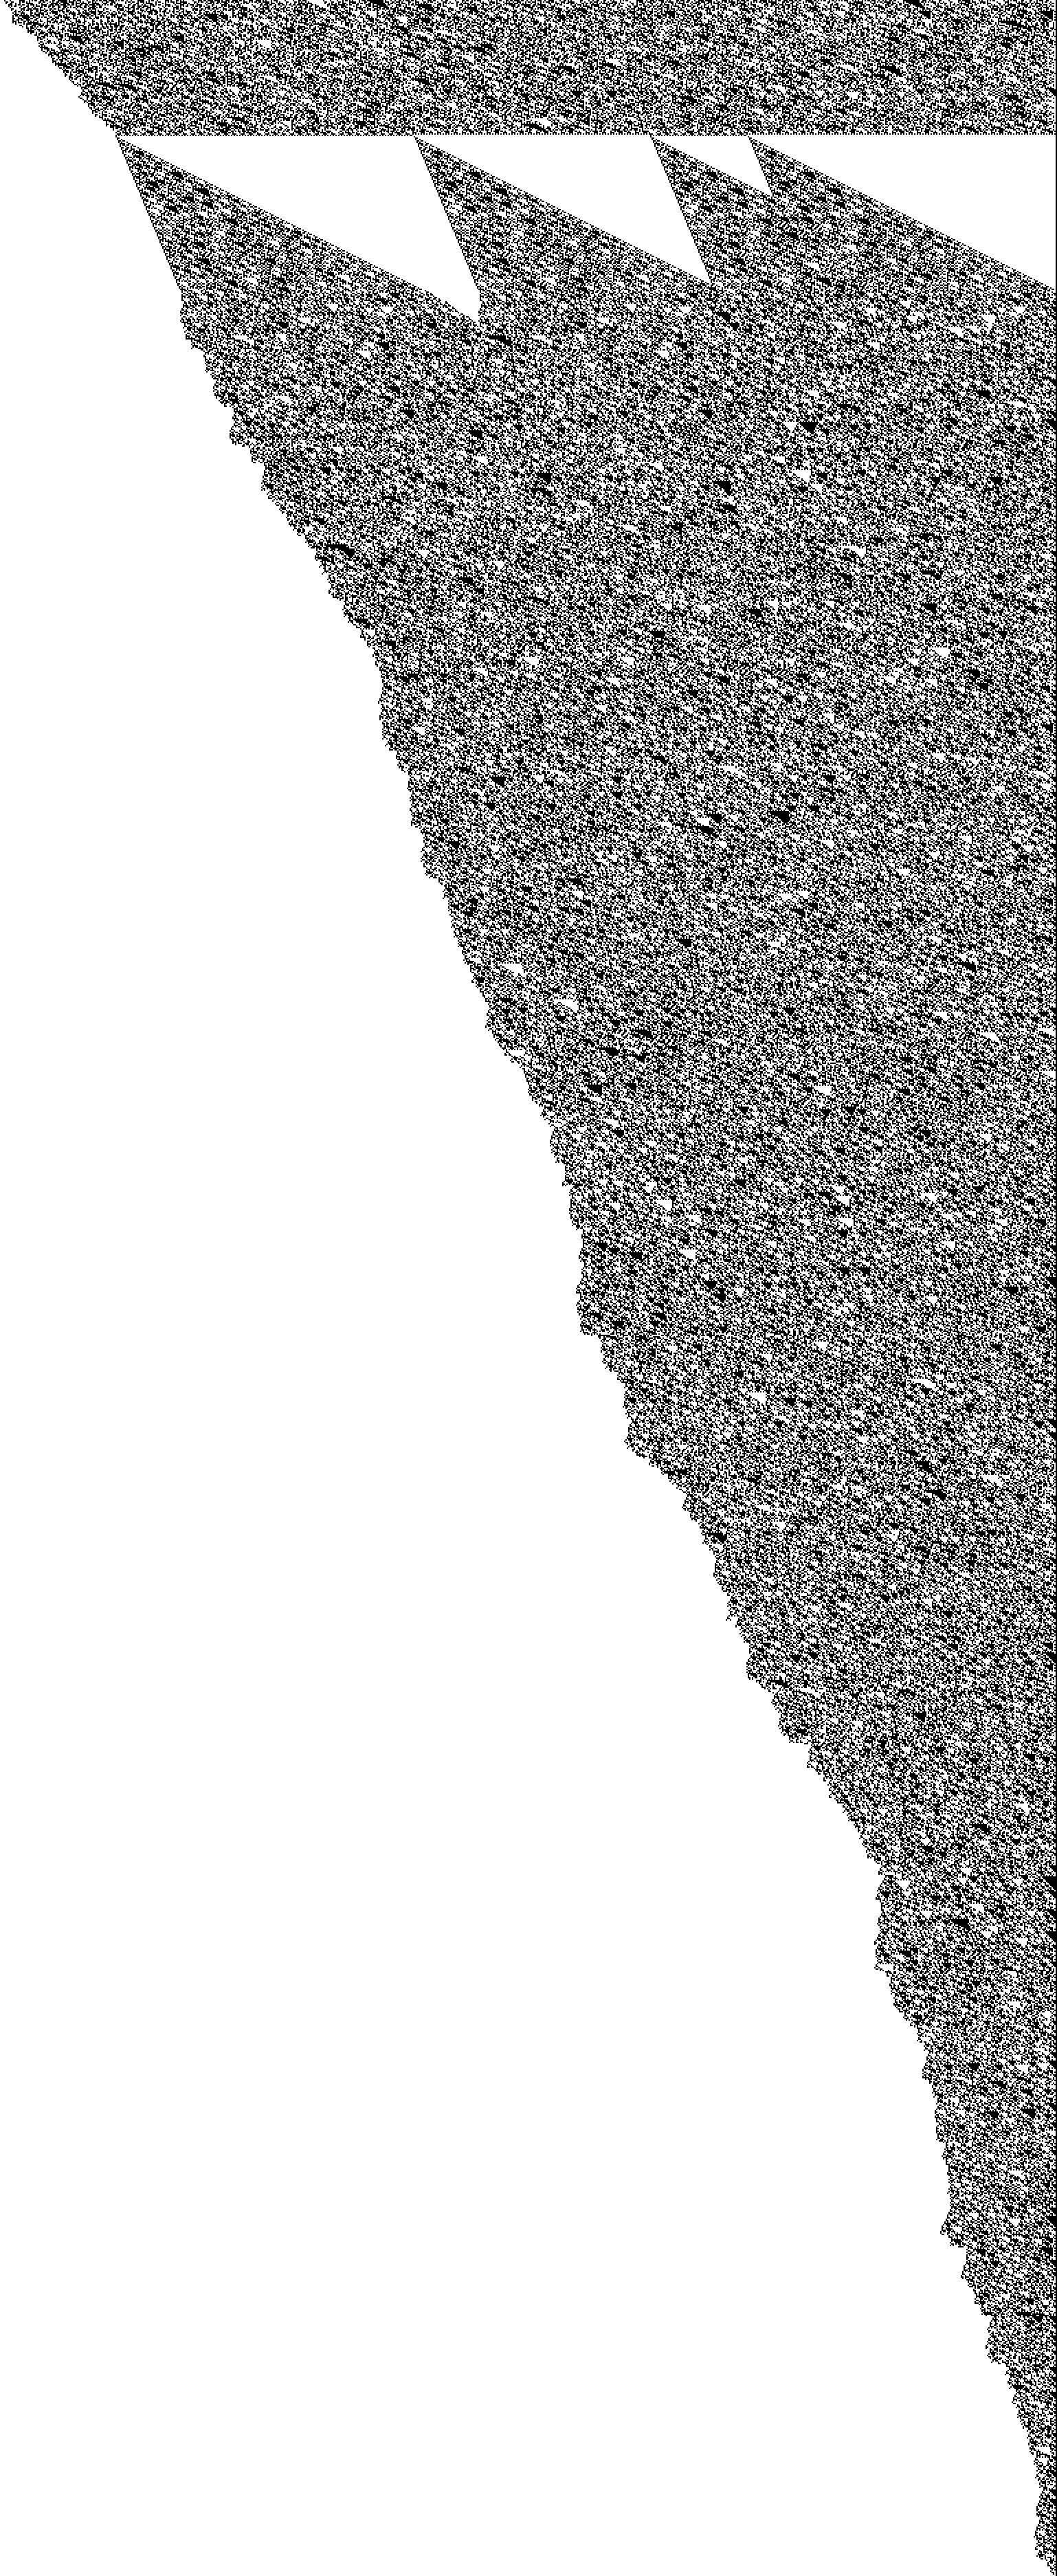

In [303]:
random_sparse_program = randomize_bits(1000, 5)
if random_sparse_program % 3 == 0:
    random_sparse_program += 1
interesting_seed = list(reverse_collatz(random_sparse_program, 100))[-1]
render_collatz(interesting_seed)

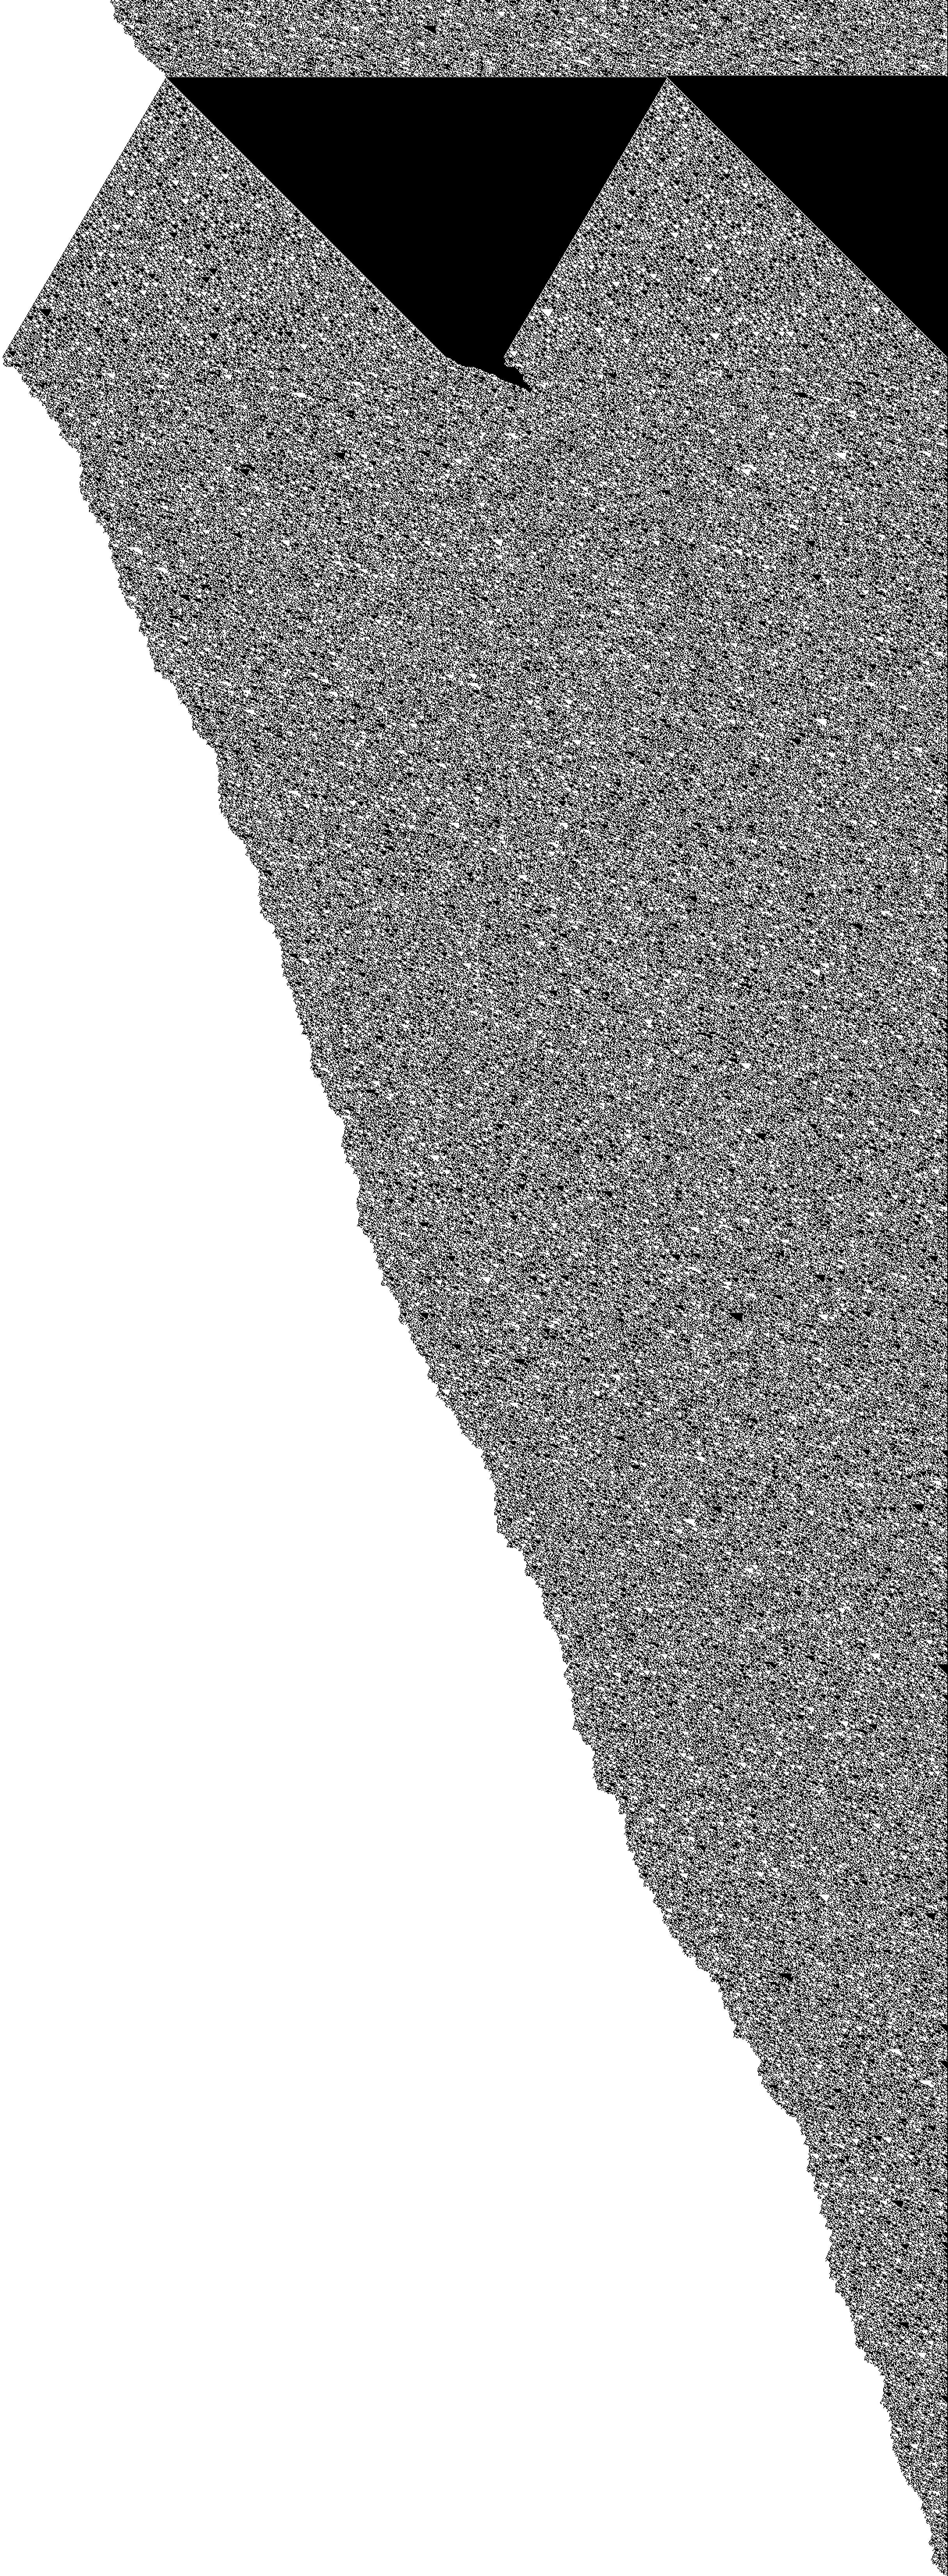

In [305]:
random_dense_program = randomize_bits(1, 1000)
if random_dense_program % 3 == 0:
    random_dense_program += 1
interesting_seed = list(reverse_collatz(random_dense_program, 100))[-1]
render_collatz(interesting_seed)


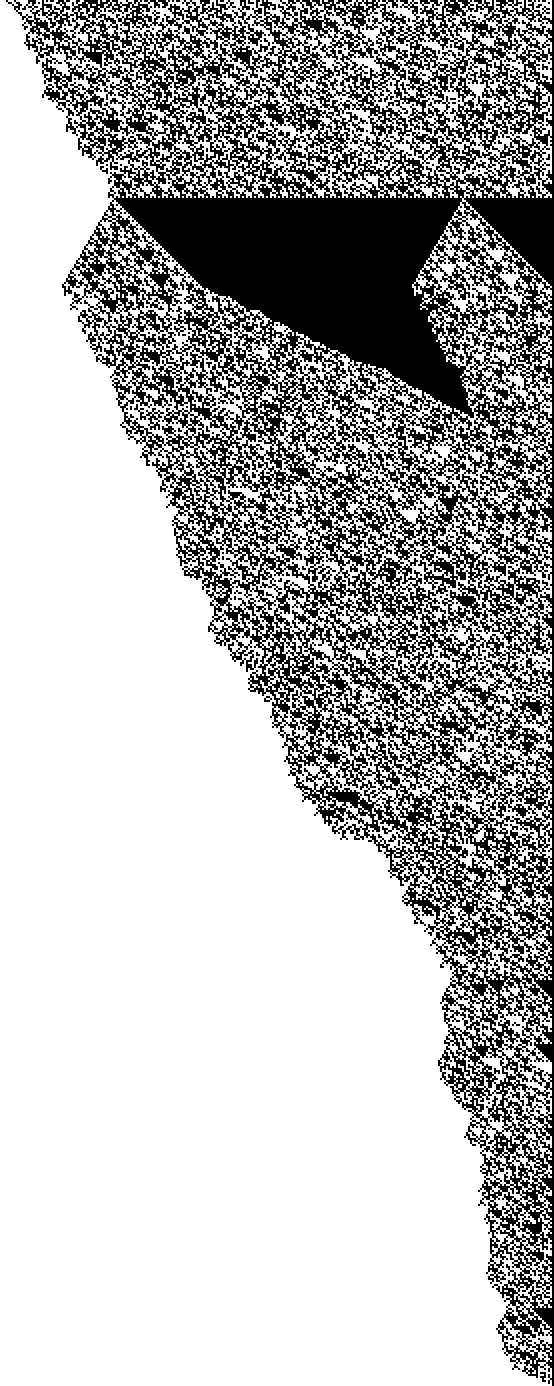

In [311]:
random_dense_program = randomize_bits(2, 1000)
if random_dense_program % 3 == 0:
    random_dense_program += 1
interesting_seed = list(reverse_collatz(random_dense_program, 100))[-1]
render_collatz(interesting_seed)
